In [12]:
import pykat
from pykat.ifo import aligo
import pykat.ifo.aligo.plot
import matplotlib.pyplot as plt

pykat.init_pykat_plotting()

In [13]:
base = aligo.make_kat("design_with_IMC_HAM2_FI_OMC")

In [14]:
base = aligo.setup(base)

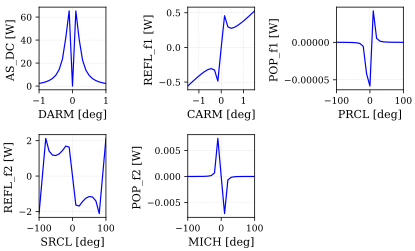

In [15]:
aligo.plot.error_signals(base, xlimits=(-1, 1), steps=20)

In [22]:
aligo.plot.error_signals??

In [36]:
base.IFO.zero_locks()

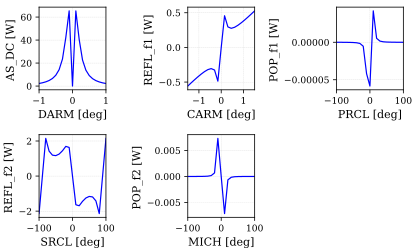

In [56]:
kat = base.deepcopy()
#kat.SR3.Rc -= 0.03
#kat.ls1.L += 0.4
kat.IFO.zero_locks()
aligo.plot.error_signals(kat, xlimits=(-1, 1), steps=20)

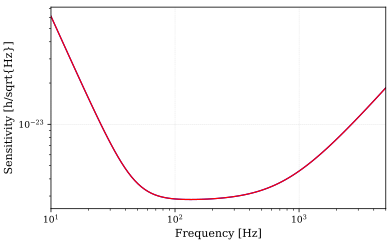

In [57]:
base.IFO.suspend_mirrors_z()
ax = plt.subplot(111)
aligo.plot.strain_sensitivity(base, ax=ax)
aligo.plot.strain_sensitivity(kat, ax=ax)

In [55]:
base.parse(base.IFO.DARM.transfer())
base.parse("qnoised noise 1 $fs nAS")
out1 = base.IFO.DARM_h.scan_f(linlog="log", lower=5, upper=5000, steps=100)

kat.parse(kat.IFO.DARM.transfer())
kat.parse("qnoised noise 1 $fs nAS")
out2 = kat.IFO.DARM_h.scan_f(linlog="log", lower=5, upper=5000, steps=100)

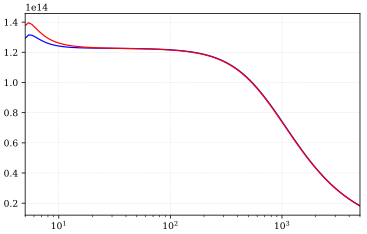

In [51]:
plt.semilogx(out1.x, out1[base.IFO.DARM.transfer_name()])
plt.semilogx(out2.x, out2[kat.IFO.DARM.transfer_name()])

In [21]:
kat.AS_DC.getFinesseText()

['pd0 AS_DC nAS']